# **FashionMNIST Classification**

**By Nada Abdellah**

# **Importing Libraries**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# **Dataset Loading & Preprocessing**

In [ ]:
# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# **Model Architecture**

In [3]:
class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = FashionMNISTClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# **Model Training**

In [4]:
# Training the model
num_epochs = 15
training_losses, test_losses = [], []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    training_losses.append(running_loss/len(train_loader))
    test_losses.append(running_loss/len(test_loader))

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")




Epoch [1/15], Loss: 0.4907
Epoch [2/15], Loss: 0.3107
Epoch [3/15], Loss: 0.2640
Epoch [4/15], Loss: 0.2358
Epoch [5/15], Loss: 0.2141
Epoch [6/15], Loss: 0.1939
Epoch [7/15], Loss: 0.1826
Epoch [8/15], Loss: 0.1707
Epoch [9/15], Loss: 0.1577
Epoch [10/15], Loss: 0.1455
Epoch [11/15], Loss: 0.1366
Epoch [12/15], Loss: 0.1277
Epoch [13/15], Loss: 0.1201
Epoch [14/15], Loss: 0.1152
Epoch [15/15], Loss: 0.1087


# **Model Testing**

In [5]:
# Evaluating the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")

Accuracy on test set: 92.67%


# **Results Visualization**

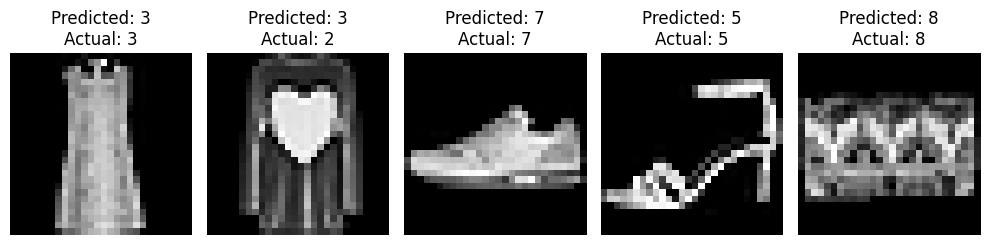

In [6]:
# Function to display images with their predicted labels
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Plot the images with their predicted labels
num_images = 5
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    imshow(torchvision.utils.make_grid(images[i].cpu()))
    plt.title(f'Predicted: {predicted[i].item()}\nActual: {labels[i].item()}')
plt.tight_layout()
plt.show()

# **Results**

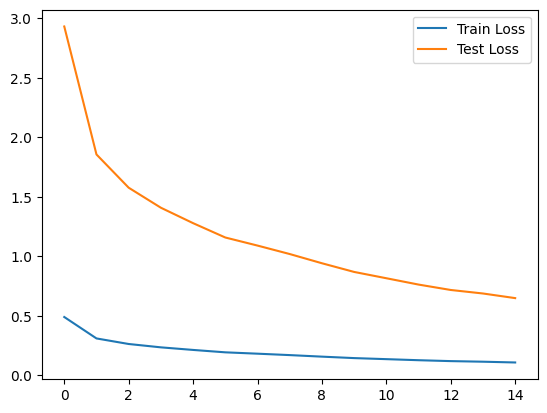

In [7]:
plt.plot(training_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()